# Unizip Program

In [1]:
!apt install unzip

!unzip -q "/content/Rice_Image_Dataset.zip"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


---

# Get Dataset

In [ ]:
!apt install git

!git clone "https://github.com/rezapace/Machine-Learning-Rice-calcification"

---

# Machine-Learning-Rice-calcification

In [4]:
# Install Package
!pip install tensorflow scikit-learn matplotlib
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [6]:
# Define paths
DATASET_PATH = "/content/Rice_Image_Dataset/"
TRAIN_DIR = os.path.join(DATASET_PATH, 'train')
VAL_DIR = os.path.join(DATASET_PATH, 'val')
TEST_DIR = os.path.join(DATASET_PATH, 'test')
SAVED_MODEL_DIR = "/content/Rice_Image_Dataset"

# Ensure directories exist
def check_directory(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"Directory not found: {path}")

try:
    check_directory(TRAIN_DIR)
    check_directory(VAL_DIR)
    check_directory(TEST_DIR)
    check_directory(SAVED_MODEL_DIR)
except FileNotFoundError as e:
    print(e)
    raise

In [7]:
# Data generators
train_val_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=35, zoom_range=[0.5, 1.1],
    width_shift_range=0.25, height_shift_range=0.25,
    shear_range=0.15, horizontal_flip=True, vertical_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data loaders
IMG_SIZE = (224, 224)
batch_size = 32
try:
    train_set = train_val_datagen.flow_from_directory(
        TRAIN_DIR, target_size=IMG_SIZE, batch_size=batch_size, class_mode="categorical"
    )
    val_set = train_val_datagen.flow_from_directory(
        VAL_DIR, target_size=IMG_SIZE, batch_size=batch_size, class_mode="categorical"
    )
    test_set = test_datagen.flow_from_directory(
        TEST_DIR, target_size=IMG_SIZE, batch_size=2*batch_size, class_mode="categorical", shuffle=False
    )
except Exception as e:
    print(f"Error loading data: {e}")
    raise

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
# Model definition
def build_model():
    try:
        model = Sequential([
            Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
            MaxPooling2D(2, 2),
            Conv2D(32, (3, 3), activation='relu'),
            MaxPooling2D(2, 2),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D(2, 2),
            Conv2D(256, (5,5), activation='relu'),
            MaxPooling2D(2,2),
            Flatten(),
            Dense(256, activation='relu'),
            Dense(2, activation='softmax')
        ])
        model.compile(loss="categorical_crossentropy", optimizer=RMSprop(learning_rate=1e-4, momentum=0.9), metrics=['accuracy'])
        return model
    except Exception as e:
        print(f"Error building model: {e}")
        raise

# Instantiate the model
model = build_model()

In [9]:
# Training model
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', min_lr=1e-8)
checkpoint_cb = ModelCheckpoint(os.path.join(SAVED_MODEL_DIR, "best_model.h5"), save_best_only=True)
early_stop_cb = EarlyStopping(patience=15, monitor='val_accuracy', restore_best_weights=True)

# Training
try:
    history = model.fit(train_set, epochs=20, validation_data=val_set, callbacks=[reduce_lr, checkpoint_cb, early_stop_cb], verbose=2)
    # Save final model
    model.save(os.path.join(SAVED_MODEL_DIR, 'final_model.h5'))
except Exception as e:
    print(f"Error during training or saving the model: {e}")
    raise

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 - 18s - loss: 0.7452 - accuracy: 0.4700 - val_loss: 0.7081 - val_accuracy: 0.5100 - lr: 1.0000e-04 - 18s/epoch - 5s/step
Epoch 2/20
4/4 - 13s - loss: 0.6922 - accuracy: 0.5100 - val_loss: 0.6985 - val_accuracy: 0.4600 - lr: 1.0000e-04 - 13s/epoch - 3s/step
Epoch 3/20
4/4 - 10s - loss: 0.6988 - accuracy: 0.4600 - val_loss: 0.6914 - val_accuracy: 0.4900 - lr: 1.0000e-04 - 10s/epoch - 2s/step
Epoch 4/20
4/4 - 11s - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.4600 - lr: 1.0000e-04 - 11s/epoch - 3s/step
Epoch 5/20
4/4 - 11s - loss: 0.6913 - accuracy: 0.5300 - val_loss: 0.6914 - val_accuracy: 0.5100 - lr: 1.0000e-04 - 11s/epoch - 3s/step
Epoch 6/20
4/4 - 11s - loss: 0.6907 - accuracy: 0.5100 - val_loss: 0.6935 - val_accuracy: 0.4600 - lr: 1.0000e-04 - 11s/epoch - 3s/step
Epoch 7/20
4/4 - 13s - loss: 0.6857 - accuracy: 0.6600 - val_loss: 0.6967 - val_accuracy: 0.4400 - lr: 1.0000e-04 - 13s/epoch - 3s/step
Epoch 8/20
4/4 - 12s - loss: 0.6851 - accuracy: 0.5800 - va

2/2 [==============================] - 2s 602ms/step - loss: 0.6704 - accuracy: 0.5900
Loss: 0.6704, Accuracy: 59.00%
2/2 [==============================] - 2s 1s/step
              precision    recall  f1-score   support

     Arborio       0.62      0.48      0.54        50
     Jasmine       0.57      0.70      0.63        50

    accuracy                           0.59       100
   macro avg       0.59      0.59      0.58       100
weighted avg       0.59      0.59      0.58       100



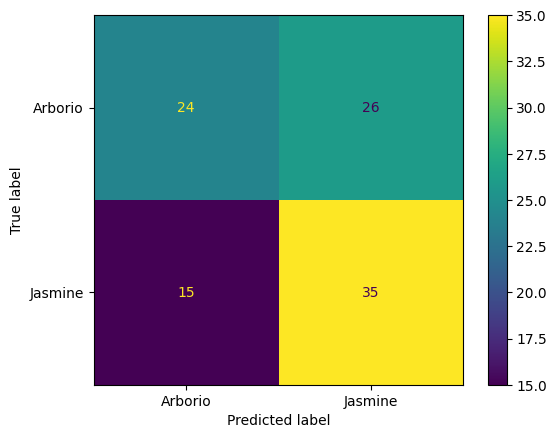

In [10]:
# Evaluation function
def evaluate_model(model, test_set):
    try:
        loss, accuracy = model.evaluate(test_set)
        print(f'Loss: {loss:.4f}, Accuracy: {accuracy*100:.2f}%')

        test_set.reset()
        predictions = model.predict(test_set)
        pred_classes = np.argmax(predictions, axis=1)
        true_classes = test_set.classes
        class_labels = list(test_set.class_indices.keys())

        print(classification_report(true_classes, pred_classes, target_names=class_labels))

        cm = confusion_matrix(true_classes, pred_classes)
        disp = ConfusionMatrixDisplay(cm, display_labels=class_labels)
        disp.plot()
        plt.show()
    except Exception as e:
        print(f"Error during model evaluation: {e}")
        raise

# Load best model and evaluate
try:
    best_model = load_model(os.path.join(SAVED_MODEL_DIR, "best_model.h5"))
    evaluate_model(best_model, test_set)
except Exception as e:
    print(f"Error loading or evaluating the model: {e}")
    raise